In [1]:
import numpy as np
import pandas as pd
from plotnine import *
import math
%matplotlib inline

# Numpy Random distributions

In [2]:
np.random.random()

0.0569942279358866

In [3]:
np.random.normal(0, 6)

0.39368259474380296

# Monte Carlo die simulations

Probability of rolling at least one 6 with 4 six-sided die?

In [17]:
a = np.random.randint(1, 7, 4000)

In [18]:
a

array([4, 5, 4, ..., 3, 6, 3])

In [21]:
a.reshape(-1, 4)

array([[1, 2, 3, 6],
       [4, 2, 6, 4],
       [6, 3, 3, 3],
       ...,
       [4, 6, 5, 1],
       [2, 6, 6, 5],
       [6, 6, 5, 4]])

In [29]:
allprobs = []
trials = 1000
experiments = 300
for i in range(experiments):
    a = np.random.randint(1, 7, 4 * trials)
    allprobs.append(len([x for x in a.reshape(-1, 4) if 6 in x]) / trials)

In [30]:
df = pd.DataFrame(allprobs, columns=["Prob"])

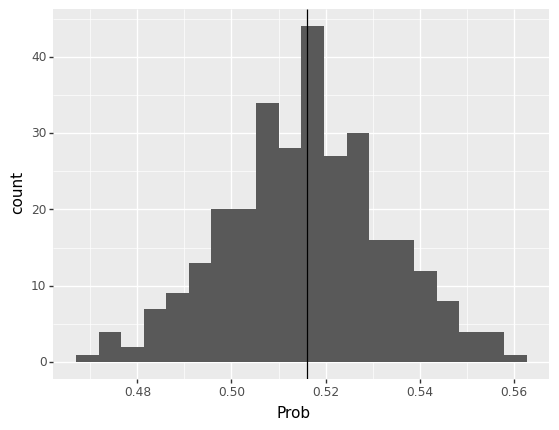

<ggplot: (8779726064966)>

In [31]:
ggplot(df, aes(x="Prob")) \
+ geom_histogram(bins=20) \
+ geom_vline(aes(xintercept=df["Prob"].mean()))

In [32]:
df["Prob"].mean()

0.5160166666666667

# Random walks and the Gambler's Ruin

You start with \$20. The game you play is to flip a coin each turn, you win one dollar if you get heads, you lose one dollar if you get tails. Play for 500 rounds, what is the expected value?

Revised to use the game above as the probability

In [45]:
trials = 1000
time = 500
init = 20
overall = []
for t in range(trials):
    winnings_hist = [init]
    for i in range(time):
        if winnings_hist[-1] == 0:
            winnings_hist.append(0)
        elif np.random.random() > 0.516:
            winnings_hist.append(winnings_hist[-1] + 1)
        else:
            winnings_hist.append(winnings_hist[-1] - 1)
    overall.append(winnings_hist)

In [46]:
df = pd.DataFrame(np.transpose(overall))
df["time"] = np.linspace(0, time, time + 1)
dfm = pd.melt(df, id_vars=["time"], value_vars=range(100))

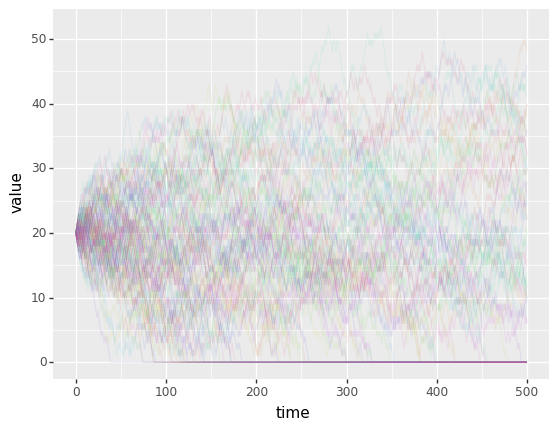

<ggplot: (8771683343445)>

In [47]:
ggplot(dfm, aes(x = "time", y = "value", color="variable")) \
+ geom_line(alpha=0.1) \
+ theme(legend_position="none")

In [48]:
ends = [o[-1] for o in overall]

In [49]:
dfends = pd.DataFrame(ends, columns=["Ending"])

/Users/goadrich/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 20'. Pick better value with 'binwidth'.


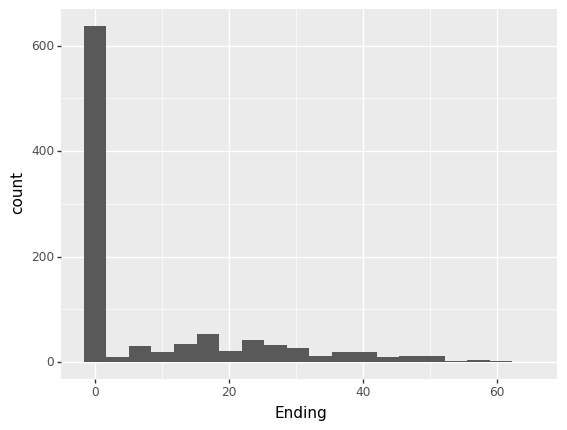

<ggplot: (8771684683105)>

In [50]:
ggplot(dfends, aes(x = "Ending")) \
+ geom_histogram()

In [51]:
aves = [np.mean(x) for x in np.transpose(overall)]

In [52]:
df["average"] = aves

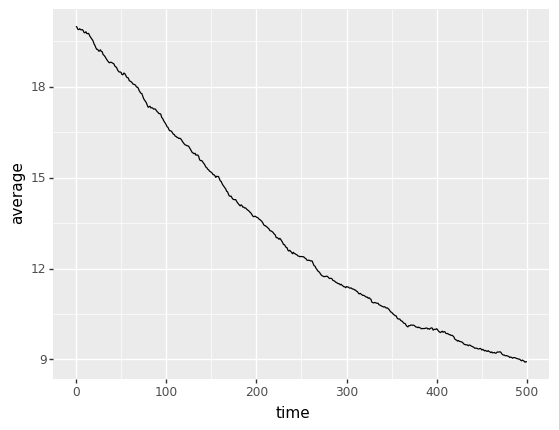

<ggplot: (8771683299780)>

In [53]:
ggplot(df, aes(x = "time", y = "average")) \
+ geom_line()